<a href="https://colab.research.google.com/github/ExCaLBBR/ExCaLBBR_Projects/blob/main/GraphingDecisions_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## Download CSV
News = pd.read_csv("https://raw.githubusercontent.com/ExCaLBBR/ExCaLBBR_Projects/refs/heads/main/GeometryBasedDecisions/data/NewsHRes_n485analyzed.csv")
Race = pd.read_csv("https://raw.githubusercontent.com/ExCaLBBR/ExCaLBBR_Projects/refs/heads/main/GeometryBasedDecisions/data/blackCoded_n485analyzed.csv")
Belief_Decision = pd.read_csv("https://raw.githubusercontent.com/ExCaLBBR/ExCaLBBR_Projects/refs/heads/main/GeometryBasedDecisions/data/df_ConEngPt1.csv")

In [ ]:
News=News.sort_values(by='Unnamed: 0')
Race=Race.sort_values(by='Unnamed: 0')
Belief_Decision=Belief_Decision.sort_values(by='Concept')

In [ ]:
News['id']=News.index
Race['id']=Race.index
Belief_Decision['id']=Belief_Decision.index
Belief_Decision.drop(0, inplace=True)

In [ ]:
combined_df=pd.DataFrame()
combined_df=pd.merge(News,Race, on='id')
combined_df=pd.merge(combined_df,Belief_Decision, on='id')

In [ ]:
combined_df.head()

,Unnamed: 0_x,Average,id,Unnamed: 0_y,Black or African American,Concept,Science,Science.1,Science.2,Science.3,...,Firefighters,Firefighters.1,Firefighters.2,Firefighters.3,Firefighters.4,Religion,Religion.1,Religion.2,Religion.3,Religion.4
0,2,-2.000000,1,2,0,11889642,Agree,Agree,Agree,Agree,...,Agree,Agree,Agree,Agree,Agree,Disagree,Agree,Agree,Agree,Disagree
1,3,4.440000,2,3,0,11889643,Agree,Agree,Agree,Agree,...,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Disagree
2,4,5.000000,3,4,0,11889644,Agree,Agree,Agree,Agree,...,Agree,Agree,Agree,Agree,Agree,Disagree,Disagree,Disagree,Disagree,Agree
3,6,-2.703333,4,6,0,11889645,Agree,Agree,Agree,Agree,...,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Disagree,Agree,Disagree
4,7,-1.900000,5,7,0,11889646,Disagree,Agree,Disagree,Disagree,...,Agree,Agree,Agree,Agree,Agree,Disagree,Agree,Agree,Agree,Disagree


In [ ]:
combined_df['New Average'] = pd.NA  # Set default as NA (optional)
combined_df.loc[combined_df['Average'] > 0, 'New Average'] = 'Right'
combined_df.loc[combined_df['Average'] < 0, 'New Average'] = 'Left'

for col in combined_df.select_dtypes(include=['object']).columns:
    combined_df[col] = combined_df[col].replace({'Agree': 1, 'Disagree': 0})

<ipython-input-58-dddaaaf3be52>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_df[col] = combined_df[col].replace({'Agree': 1, 'Disagree': 0})


In [ ]:
combined_df.dropna(inplace=True)
combined_df.sort_values(by='New Average', inplace=True)

In [ ]:
right_pa=combined_df.copy()
right_pa = right_pa[right_pa['New Average'] != 'Left']

left_pa=combined_df.copy()
left_pa = left_pa[left_pa['New Average'] != 'Right']

In [ ]:
right_rows=right_pa.shape[0]
left_rows=left_pa.shape[0]

r_counts={}
r_prop={}
r_se={}
for col in right_pa.columns:
  r_counts[col]=right_pa[col].value_counts()
  r_counts[col]=r_counts[col].values[0]
  r_prop[col]=r_counts[col]/right_rows
  r_se[col] = np.sqrt((r_prop[col] * (1 - r_prop[col])) / right_rows)*1.96

l_counts={}
l_prop={}
l_se={}
for col in left_pa.columns:
  l_counts[col]=left_pa[col].value_counts()
  l_counts[col]=l_counts[col].values[0]
  l_prop[col]=l_counts[col]/left_rows
  l_se[col] = np.sqrt((l_prop[col] * (1 - l_prop[col])) / left_rows)*1.96




lr_prop=pd.DataFrame([r_prop,l_prop],index=['Right','Left'])
lr_std=pd.DataFrame([r_se,l_se],index=['Right','Left'])

,Unnamed: 0_x,Average,id,Unnamed: 0_y,Black or African American,Concept,Science,Science.1,Science.2,Science.3,...,Firefighters.1,Firefighters.2,Firefighters.3,Firefighters.4,Religion,Religion.1,Religion.2,Religion.3,Religion.4,New Average
Right,0.006211,0.236025,0.006211,0.006211,0.509317,0.006211,0.881988,0.788820,0.900621,0.857143,...,0.962733,0.950311,0.770186,0.956522,0.527950,0.552795,0.732919,0.552795,0.596273,1.0
Left,0.003145,0.135220,0.003145,0.003145,0.500000,0.003145,0.874214,0.811321,0.902516,0.889937,...,0.952830,0.974843,0.748428,0.968553,0.569182,0.575472,0.638365,0.547170,0.503145,1.0


In [ ]:
lr_std


,Unnamed: 0_x,Average,id,Unnamed: 0_y,Black or African American,Concept,Science,Science.1,Science.2,Science.3,...,Firefighters.1,Firefighters.2,Firefighters.3,Firefighters.4,Religion,Religion.1,Religion.2,Religion.3,Religion.4,New Average
Right,0.012136,0.065594,0.012136,0.012136,0.077221,0.012136,0.049835,0.063046,0.046213,0.054053,...,0.029259,0.033567,0.064987,0.031501,0.077114,0.076803,0.068343,0.076803,0.075790,0.0
Left,0.006154,0.037585,0.006154,0.006154,0.054956,0.006154,0.036448,0.043003,0.032601,0.034399,...,0.023301,0.017212,0.047692,0.019182,0.054427,0.054326,0.052810,0.054711,0.054955,0.0


In [ ]:
lr_all=pd.concat([lr_prop, lr_std])
lr_all


,Unnamed: 0_x,Average,id,Unnamed: 0_y,Black or African American,Concept,Science,Science.1,Science.2,Science.3,...,Firefighters.1,Firefighters.2,Firefighters.3,Firefighters.4,Religion,Religion.1,Religion.2,Religion.3,Religion.4,New Average
Right,0.006211,0.236025,0.006211,0.006211,0.509317,0.006211,0.881988,0.788820,0.900621,0.857143,...,0.962733,0.950311,0.770186,0.956522,0.527950,0.552795,0.732919,0.552795,0.596273,1.0
Left,0.003145,0.135220,0.003145,0.003145,0.500000,0.003145,0.874214,0.811321,0.902516,0.889937,...,0.952830,0.974843,0.748428,0.968553,0.569182,0.575472,0.638365,0.547170,0.503145,1.0
Right,0.012136,0.065594,0.012136,0.012136,0.077221,0.012136,0.049835,0.063046,0.046213,0.054053,...,0.029259,0.033567,0.064987,0.031501,0.077114,0.076803,0.068343,0.076803,0.075790,0.0
Left,0.006154,0.037585,0.006154,0.006154,0.054956,0.006154,0.036448,0.043003,0.032601,0.034399,...,0.023301,0.017212,0.047692,0.019182,0.054427,0.054326,0.052810,0.054711,0.054955,0.0


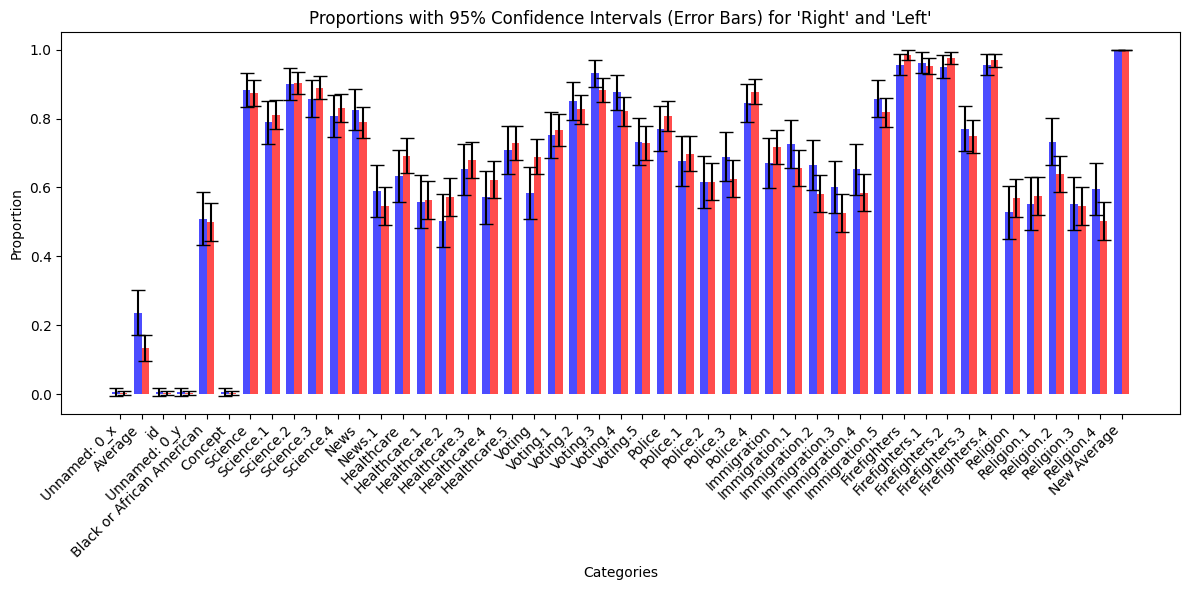

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))

# Set the position of the bars on the x-axis
x = np.arange(len(lr_all.columns))  # The number of categories (columns)
width = 0.35  # Bar width

# Plot the bars for 'Right' and 'Left'
for i, col in enumerate(lr_all.columns):
  # Accessing data using iloc for numerical indexing
  right_proportion = lr_all.iloc[0][col]  # Accessing 'Right' data
  left_proportion = lr_all.iloc[1][col]   # Accessing 'Left' data
  right_se = lr_all.iloc[2][col]         # Accessing 'Right' SE data (assuming it's in the third row)
  left_se = lr_all.iloc[3][col]           # Accessing 'Left' SE data (assuming it's in the fourth row)

  plt.bar(x[i] - width / 2, right_proportion, width, yerr=right_se, capsize=5, label=f"{col} - Right", alpha=0.7, color='blue')
  plt.bar(x[i] + width / 2, left_proportion, width, yerr=left_se, capsize=5, label=f"{col} - Left", alpha=0.7, color='red')

# Formatting
plt.xlabel("Categories")
plt.ylabel("Proportion")
plt.title("Proportions with 95% Confidence Intervals (Error Bars) for 'Right' and 'Left'")
plt.xticks(x, lr_all.columns, rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()